In [1]:
from mylib.statistic_test import *

code_id = "0874 - Detailed Dynamical Analysis"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

dir_name = r'D:\Data\FinalResults\Dsp\Reforming Neural Trajectory Analysis'

pass

d:\Software\Anaconda3\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis is already existed!


# PVC 

        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\PVC is already existed!


  0%|          | 0/7 [00:00<?, ?it/s]d:\Software\Anaconda3\envs\maze\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Software\Anaconda3\envs\maze\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
100%|██████████| 7/7 [00:00<00:00, 92.11it/s]


        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\PVC is already existed!


100%|██████████| 7/7 [00:00<00:00, 94.60it/s]


        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\PVC is already existed!


100%|██████████| 7/7 [00:00<00:00, 81.90it/s]


        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\PVC is already existed!


100%|██████████| 7/7 [00:00<00:00, 48.81it/s]
C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_28324\3863490184.py:75: RuntimeWarning: Mean of empty slice
  stacked_pvc_mean = np.nanmean(stacked_pvc_all, axis=2)


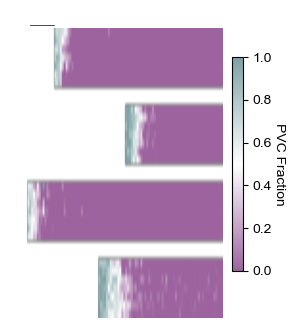

In [65]:
def draw_pvc(mouse: int, maze_type: int = 1):
    save_dir = join(loc, "PVC")
    mkdir(save_dir)
    file_idx = np.where((f2['MiceID'] == mouse) & (f2['maze_type'] == maze_type))[0]
    
    traces = []
    for i in tqdm(file_idx):
        with open(f2['Trace File'][i], 'rb') as f:
            trace = pickle.load(f)
        traces.append(trace)
        
    ctrl_pvc_mean = np.zeros((len(file_idx)*2, 144), np.float64)
    for i, trace in enumerate(tqdm(traces)):
        for j in range(144):
            ctrl_pvc_mean[i*2, j] = np.corrcoef(
                trace['node 0']['old_map_clear'][:, j], 
                trace['node 4']['old_map_clear'][:, j]
            )[0, 1]
            ctrl_pvc_mean[i*2+1, j] = np.corrcoef(
                trace['node 5']['old_map_clear'][:, j], 
                trace['node 9']['old_map_clear'][:, j]
            )[0, 1]
            
    #ctrl_pvc_mean = np.nanmean(ctrl_pvc_mean, axis=0)
    
    stacked_pvc = []
    for r in [1, 2, 4, 5]:
        for i in range(7):
            ctrl_pvc_mean_s = ctrl_pvc_mean[i*2, :] if r in [1, 2] else ctrl_pvc_mean[i*2+1, :]
            real_pvc = np.zeros(144, np.float64)
            for j in range(144):
                real_pvc[j] = np.corrcoef(
                    traces[i]['node 0']['old_map_clear'][:, j], 
                    traces[i][f'node {r}']['old_map_clear'][:, j]
                )[0, 1] if r in [1, 2] else np.corrcoef(
                    traces[i]['node 5']['old_map_clear'][:, j], 
                    traces[i][f'node {r+2}']['old_map_clear'][:, j]
                )[0, 1]
            
            pvc_frac = real_pvc / ctrl_pvc_mean_s
            keep_bins = np.intersect1d(
                CP_DSPs[maze_type][0], CP_DSPs[maze_type][r]
            )
            remove_bins = np.setdiff1d(np.arange(144), keep_bins-1)
            pvc_frac[remove_bins] = np.nan
            stacked_pvc.append(pvc_frac[CP_DSPs[maze_type][0]-1][np.newaxis, :])
        
        if r != 5:
            stacked_pvc.append(np.full((2, len(CP_DSPs[maze_type][0])), np.nan))
            
    stacked_pvc = np.vstack(stacked_pvc)
    with open(join(save_dir, f'{mouse}_M{maze_type}_R1.pkl'), 'wb') as f:
        pickle.dump(stacked_pvc, f)
    
    fig = plt.figure(figsize=(3, 4))
    ax = Clear_Axes(plt.axes())
    im = ax.imshow(1-stacked_pvc, aspect='auto', cmap=RetrievCmap, vmin=0, vmax=1, interpolation=None)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('PVC Fraction', rotation=270, labelpad=10)
    plt.savefig(join(save_dir, f'{mouse}_M{maze_type}.png'), dpi=600)
    plt.savefig(join(save_dir, f'{mouse}_M{maze_type}.svg'), dpi=600)
    plt.close() 

draw_pvc(10212, maze_type=1)
draw_pvc(10224, maze_type=1)
draw_pvc(10227, maze_type=1)
draw_pvc(10232, maze_type=1)
""""""
stacked_pvc_all = []
for mouse in [10212, 10224, 10227, 10232]:
    with open(join(loc, "PVC", f'{mouse}_M1_R1.pkl'), 'rb') as f:
        stacked_pvc = pickle.load(f)
    stacked_pvc_all.append(stacked_pvc)
stacked_pvc_all = np.stack(stacked_pvc_all, 2)
stacked_pvc_mean = np.nanmean(stacked_pvc_all, axis=2)

fig = plt.figure(figsize=(3, 4))
ax = Clear_Axes(plt.axes())
im = ax.imshow(1-stacked_pvc_mean, aspect='auto', cmap=RetrievCmap, vmin=0, vmax=1)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('PVC Fraction', rotation=270, labelpad=10)
ax.plot([10, 22.5], [-1, -1], c='k', lw=0.5)
plt.savefig(join(loc, "PVC", f'All_Mice_M1.png'), dpi=600)
plt.savefig(join(loc, "PVC", f'All_Mice_M1.svg'), dpi=600)
plt.show()

# Behavioral Retrieval

        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\Behavioral Retrieval is already existed!


C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_28324\2845470805.py:27: RuntimeWarning: invalid value encountered in divide
  prop_rt_frac = prop_rt / prop_r0_mean
C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_28324\2845470805.py:27: RuntimeWarning: divide by zero encountered in divide
  prop_rt_frac = prop_rt / prop_r0_mean


        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\Behavioral Retrieval is already existed!
        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\Behavioral Retrieval is already existed!
        D:\Data\FinalResults\Dsp\0874 - Detailed Dynamical Analysis\Behavioral Retrieval is already existed!


C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_28324\2845470805.py:67: RuntimeWarning: Mean of empty slice
  stacked_prop_mean = np.nanmean(stacked_prop_all, axis=2)


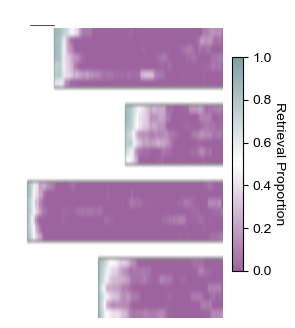

In [66]:
file_load_dir = join(figpath, r"Dsp\0860 - 2 - Retrieval on Session-Basis\Retrieval Results")
dir_name = join(figpath, "Dsp", "Reforming Neural Trajectory Analysis") 

def get_behav_retriv_data(
    mouse: int,
    rt: int
):
    if exists(join(file_load_dir, f"{mouse}_behav_R{rt+1}.pkl")):
        with open(join(file_load_dir, f"{mouse}_behav_R{rt+1}.pkl"), 'rb') as f:
            return pickle.load(f)    

def hidden_state_proportion(
    mouse: int,
    maze_type: int
):
    save_dir = join(loc, "Behavioral Retrieval")
    mkdir(save_dir)
    prop_r0 = get_behav_retriv_data(mouse, rt=0)
    #prop_r0_mean = np.nanmean(prop_r0, axis=1)
    prop_r0_mean = np.zeros((prop_r0.shape[0], 7), np.float64)
    for i in range(7):
        prop_r0_mean[:, i] = np.nanmean(prop_r0[:, i*4:i*4+4], axis=1)
        
    stacked_prop = []
    for rt in [1, 2, 4, 5]:
        prop_rt = get_behav_retriv_data(mouse, rt=rt)
        prop_rt_frac = prop_rt / prop_r0_mean
        
        set_nan_idx = np.setdiff1d(
            np.arange(144),
            np.intersect1d(
                CP_DSPs[maze_type][0],
                CP_DSPs[maze_type][rt]
            ) - 1
        )
        prop_rt_frac[set_nan_idx, :] = np.nan
        stacked_prop.append(prop_rt_frac.T[:, CP_DSPs[maze_type][0]-1])
        
        if rt != 5:
            stacked_prop.append(np.full((2, len(CP_DSPs[maze_type][0])), np.nan))
    
    stacked_prop = np.vstack(stacked_prop)
    with open(join(save_dir, f'{mouse}_M{maze_type}_R1.pkl'), 'wb') as f:
        pickle.dump(stacked_prop, f)
        
    fig = plt.figure(figsize=(3, 4))
    ax = Clear_Axes(plt.axes())
    im = ax.imshow(1-stacked_prop, aspect='auto', cmap=RetrievCmap, vmin=0, vmax=1, interpolation=None)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Retrieval Proportion', rotation=270, labelpad=10)
    plt.savefig(join(save_dir, f'{mouse}_M{maze_type}.png'), dpi=600)
    plt.savefig(join(save_dir, f'{mouse}_M{maze_type}.svg'), dpi=600)
    plt.close()
    
hidden_state_proportion(10212, maze_type=1)
hidden_state_proportion(10224, maze_type=1)
hidden_state_proportion(10227, maze_type=1)
hidden_state_proportion(10232, maze_type=1)

stacked_prop_all = []
for mouse in [10212, 10224, 10227, 10232]:
    with open(join(loc, "Behavioral Retrieval", f'{mouse}_M1_R1.pkl'), 'rb') as f:
        stacked_prop = pickle.load(f)
        
    stacked_prop_all.append(stacked_prop)
stacked_prop_all = np.stack(stacked_prop_all, 2)
stacked_prop_mean = np.nanmean(stacked_prop_all, axis=2)
fig = plt.figure(figsize=(3, 4))
ax = Clear_Axes(plt.axes())
im = ax.imshow(1-stacked_prop_mean, aspect='auto', cmap=RetrievCmap, vmin=0, vmax=1)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Retrieval Proportion', rotation=270, labelpad=10)
ax.plot([10, 22.5], [-1, -1], c='k', lw=0.5)
plt.savefig(join(loc, "Behavioral Retrieval", f'All_Mice_M1.png'), dpi=600)
plt.savefig(join(loc, "Behavioral Retrieval", f'All_Mice_M1.svg'), dpi=600)
plt.show()
        


224


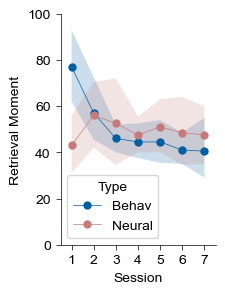

Spearman Correlation
SignificanceResult(statistic=0.0013197226745717092, pvalue=0.9889816021869636)
SignificanceResult(statistic=-0.4286364170931855, pvalue=2.4168325886981156e-06)
Kruskal-Wallis Test
KruskalResult(statistic=1.983115373642064, pvalue=0.9212449063130008)
KruskalResult(statistic=24.846442962741843, pvalue=0.0003645445535729289)
16


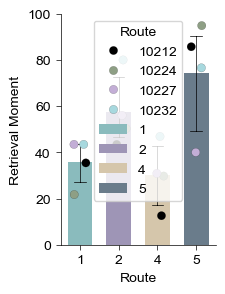

F_onewayResult(statistic=5.8396462218804075, pvalue=0.010675890919219588)


In [99]:
if exists(join(figdata, f" {code_id} [Retrieval Moment].pkl")) == False:
    RetrievalMoment = {
        "MiceID": [],
        "Retrieval Moment": [],
        "Type": [],
        "Session": [],
        "Route": []
    }
    
    for mouse in [10212, 10224, 10227, 10232]:
        with open(join(loc, "PVC", f'{mouse}_M1_R1.pkl'), 'rb') as f:
            pvc_data = pickle.load(f)
            
        with open(join(loc, "Behavioral Retrieval", f'{mouse}_M1_R1.pkl'), 'rb') as f:
            behav_data = pickle.load(f)
        
        for i, rt in enumerate([1, 2, 4, 5]): 
            
            if rt in [1, 2]:
                init_pos = np.where(CP_DSPs[1][0] == CP_DSPs[1][rt][0])[0][0] 
            else:
                init_pos = np.where(CP_DSPs[1][0] == CP_DSPs[1][rt][rt-2])[0][0]

            thre = 0.5
            for s in range(7):
                retriv_t = (np.where(behav_data[i*9+s, :] >= thre)[0][0] - init_pos + 1) * 8
                RetrievalMoment["MiceID"].append(mouse)
                RetrievalMoment["Type"].append(f"Behav")
                RetrievalMoment["Retrieval Moment"].append(retriv_t)
                RetrievalMoment["Session"].append(s+1)
                RetrievalMoment["Route"].append(rt)
        
                retriv_t = (np.where(pvc_data[i*9+s, :] >= thre)[0][0] - init_pos + 1) * 8
                RetrievalMoment["MiceID"].append(mouse)
                RetrievalMoment["Type"].append(f"Neural")
                RetrievalMoment["Retrieval Moment"].append(retriv_t)
                RetrievalMoment["Session"].append(s+1)
                RetrievalMoment["Route"].append(rt) 
    
    for k in RetrievalMoment.keys():
        RetrievalMoment[k] = np.array(RetrievalMoment[k])
    
    with open(join(figdata, f"{code_id} [Retrieval Moment].pkl"), 'wb') as f:
        pickle.dump(RetrievalMoment, f)
        
    RetrievalMomentD = pd.DataFrame(RetrievalMoment)
    RetrievalMomentD.to_excel(join(figdata, f"{code_id} [Retrieval Moment].xlsx"), index=False)
    print(len(RetrievalMomentD))
else:
    with open(join(figdata, f"{code_id} [Retrieval Moment].pkl"), 'rb') as f:
        RetrievalMoment = pickle.load(f)
        
fig = plt.figure(figsize=(2, 3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x='Session',
    y='Retrieval Moment',
    hue='Type',
    data=RetrievalMoment,
    ax=ax,
    linewidth=0.5,
    #edgecolor='k',
    err_kws={'edgecolor': None},
    palette=['#005ea2', '#c67a7a'],
    #size=5,
    #dodge=True,
    marker='o',
    markeredgewidth=0,
    markersize=6,
)
ax.set_ylim(0, 100)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_xlim(0.5, 7.5)
ax.set_xticks(np.arange(1, 8))
plt.savefig(join(loc, "Retrieval Moment.png"), dpi=600)
plt.savefig(join(loc, "Retrieval Moment.svg"), dpi=600)
plt.show()

res_n = [
    RetrievalMoment['Retrieval Moment'][np.where(
        (RetrievalMoment['Type'] == 'Neural') & 
        (RetrievalMoment['Session'] == s)
    )[0]] for s in range(1, 8)
]
idx_n = np.where(RetrievalMoment['Type'] == 'Neural')[0]
res_b = [
    RetrievalMoment['Retrieval Moment'][np.where(
        (RetrievalMoment['Type'] == 'Behav') & 
        (RetrievalMoment['Session'] == s)
    )[0]] for s in range(1, 8)
]
idx_b = np.where(RetrievalMoment['Type'] == 'Behav')[0]
print("Spearman Correlation")
print(spearmanr(RetrievalMoment['Session'][idx_n], RetrievalMoment['Retrieval Moment'][idx_n]))
print(spearmanr(RetrievalMoment['Session'][idx_b], RetrievalMoment['Retrieval Moment'][idx_b]))
print("Kruskal-Wallis Test")
from scipy.stats import kruskal
print(kruskal(*res_n))
print(kruskal(*res_b))

if exists(join(figdata, f" {code_id} [Retrieval Moment Avg].pkl")) == False:
    AvgRetriv = {
        "MiceID": [],
        "Retrieval Moment": [],
        "Route": []
    }
    
    with open(join(figdata, f"{code_id} [Retrieval Moment].pkl"), 'rb') as f:
        RetrievalMoment = pickle.load(f)
        
    for mouse in [10212, 10224, 10227, 10232]:
        for rt in [1, 2, 4, 5]:
            retriv_data = RetrievalMoment['Retrieval Moment'][
                np.where(
                    (RetrievalMoment['MiceID'] == mouse) & 
                    (RetrievalMoment['Route'] == rt) & 
                    (RetrievalMoment['Type'] == 'Neural')
                )[0]
            ]
            avg_retriv = np.nanmean(retriv_data)
                
            AvgRetriv['MiceID'].append(mouse)
            AvgRetriv['Route'].append(rt)
            AvgRetriv['Retrieval Moment'].append(avg_retriv)
            
    for k in AvgRetriv.keys():
        AvgRetriv[k] = np.array(AvgRetriv[k])
        
    with open(join(figdata, f"{code_id} [Retrieval Moment Avg].pkl"), 'wb') as f:
        pickle.dump(AvgRetriv, f)
        
    AvgRetrivD = pd.DataFrame(AvgRetriv)
    AvgRetrivD.to_excel(join(figdata, f"{code_id} [Retrieval Moment Avg].xlsx"), index=False)
    print(len(AvgRetrivD))
else:
    with open(join(figdata, f"{code_id} [Retrieval Moment Avg].pkl"), 'rb') as f:
        AvgRetriv = pickle.load(f)
        
fig = plt.figure(figsize=(2, 3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x='Route',
    y='Retrieval Moment',
    hue='MiceID',
    data=AvgRetriv,
    ax=ax,
    palette=['k']+MicePaletteDSP[1:],
    size=6,
    jitter=0.2,
    linewidth=0.1,
    dodge=False,
    edgecolor='k'
)
ax.set_ylim(0, 100)
ax.set_yticks(np.linspace(0, 100, 6))
sns.barplot(
    x='Route',
    y='Retrieval Moment',
    hue='Route',
    data=AvgRetriv,
    palette=[DSPPalette[i] for i in [1, 2, 4, 5]],
    ax=ax,
    capsize=0.3,
    gap=0.2,
    err_kws={"linewidth": 0.5, 'color': 'k'},
)
plt.savefig(join(loc, "Route-wise Retrieval Moment.png"), dpi=600)
plt.savefig(join(loc, "Route-wise Retrieval Moment.svg"), dpi=600)
plt.show()

res = [
    AvgRetriv['Retrieval Moment'][np.where(
        (AvgRetriv['Route'] == rt)
    )[0]] for rt in [1, 2, 4, 5]
]
print(f_oneway(*res))

(2156,) (1153,)


100%|██████████| 1153/1153 [00:00<00:00, 12589.61it/s]


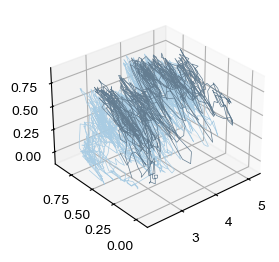

In [14]:
def get_intersected(route: int, maze_type: int):
    return np.intersect1d(CP_DSPs[maze_type][route], CP_DSPs[maze_type][0])

def get_cell_indexes(mouse: int, session: int):
    assert session < 7 and isinstance(session, int)
    idx = np.where(f_CellReg_dsp['MiceID'] == mouse)[0][0]
    
    with open(f_CellReg_dsp['cellreg_folder'][idx], 'rb') as f:
        index_map = pickle.load(f).astype(np.int64)
        
    if mouse in [10212, 10224, 10227]:
        index_map = index_map[1:, :]
    
    is_cell = np.where(index_map > 0, 1, 0)
    idx = np.where(np.sum(is_cell, axis=0) == 7)[0]
    return index_map[session, idx] - 1

def get_r0_map(trace: dict, route: int, session: int):
    assert route != 0, "Route 0 is not supported."
    if trace['maze_type'] in [1, 2]:
        if route in [1, 2, 3]:
            included_nodes = [0, 4]
        else:
            included_nodes = [5, 9]
    elif trace['maze_type'] == 4:
        if route in [1, 2, 3, 7]:
            included_nodes = [0, 5]
        else:
            included_nodes = [6, 10]
    else:
        raise ValueError(f"Unsupported maze type. Got {trace['maze_type']}")
    
    mean_map = np.mean(np.stack([trace[f'node {n}']['smooth_map_all'] for n in included_nodes], axis=2), axis=2)
    return mean_map[get_cell_indexes(trace['MiceID'], session), :]

def get_mean_map(trace: dict, route: int, session: int):
    assert route != 0, "Route 0 is not supported."
    convertor1 = np.array([0, 1, 2, 3, 6, 7, 8])
    convertor1m = np.array([0, 1, 2, 3, 7, 8, 9, 4])
    if trace['maze_type'] in [1, 2]:
        included_nodes = convertor1[route]
    elif trace['maze_type'] == 4:
        included_nodes = convertor1m[route]
        
    return trace[f'node {included_nodes}']['smooth_map_all'][get_cell_indexes(trace['MiceID'], session), :]

def identify_part(route: int, maze_type: int):
    assert route != 0, "Route 0 is not supported."
    if maze_type in [1, 2]:
        if route in [1, 2, 3]:
            return 0
        else:
            return 1

def is_forward(nodes_traj: np.ndarray, maze_type: int, nx: int = 48):
    D = GetDMatrices(maze_type=maze_type, nx=nx)
    return np.diff(D[nodes_traj, 0]) >= 0

def set_axes_equal(ax):
    """Make 3D plots have equal aspect ratio."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])

    max_range = max([x_range, y_range, z_range])

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    z_middle = np.mean(z_limits)

    ax.set_xlim3d([x_middle - max_range/2, x_middle + max_range/2])
    ax.set_ylim3d([y_middle - max_range/2, y_middle + max_range/2])
    ax.set_zlim3d([z_middle - max_range/2, z_middle + max_range/2])

R = 5
S = 6
M = 10227
with open(join(dir_name, f'{M}.pkl'), 'rb') as f:
    res = pickle.load(f)
    
with open(f2['Trace File'][np.where(f2['MiceID'] == M)[0][S]], 'rb') as f:
    trace = pickle.load(f)
    
D = GetDMatrices(maze_type=trace['maze_type'], nx=48)
neural_traj = res['neural_traj']
time_traj = res['time_traj']
nodes_traj = res['pos_traj']
session_traj = res['session_traj']
route_traj = res['route_traj']
lap_traj = res['lap_traj']

beg, end = LapSplit(trace, behavior_paradigm='CrossMaze')
first_SB_lap = np.where(trace['correct_time'][end] >= trace['node 5']['ms_time_behav'][0])[0][0]

idx_R = np.where((session_traj == S) & (route_traj == R) & np.isin(S2F[nodes_traj], get_intersected(R, trace['maze_type'])))[0]
if identify_part(R, trace['maze_type']) == 0:
    idx_R0 = np.where(
        (session_traj == S) & 
        (route_traj != 3) & 
        (route_traj != 6) & 
        (lap_traj < first_SB_lap) & 
        np.isin(S2F[nodes_traj], get_intersected(R, trace['maze_type']))
    )[0]
else:
    idx_R0 = np.where(
        (session_traj == S) & 
        (route_traj == 0) & 
        (lap_traj >= first_SB_lap) & 
        np.isin(S2F[nodes_traj], get_intersected(R, trace['maze_type']))
    )[0]

mean_map_r0 = get_r0_map(trace, R, session=S)
mean_map_r = get_mean_map(trace, R, session=S)
corr_traj_R = np.zeros((idx_R.shape[0], 2), dtype=np.float64)
corr_traj_R0 = np.zeros((idx_R0.shape[0], 2), dtype=np.float64)

print(idx_R0.shape, idx_R.shape)

assert mean_map_r0.shape[0] == neural_traj.shape[0]

for i in tqdm(range(len(corr_traj_R0))):
    corr_traj_R0[i, 0] = np.corrcoef(neural_traj[:, idx_R0[i]], mean_map_r0[:, nodes_traj[idx_R0[i]]])[0, 1]
    corr_traj_R0[i, 1] = np.corrcoef(neural_traj[:, idx_R0[i]], mean_map_r[:, nodes_traj[idx_R0[i]]])[0, 1]

for i in tqdm(range(len(corr_traj_R))):
    corr_traj_R[i, 0] = np.corrcoef(neural_traj[:, idx_R[i]], mean_map_r0[:, nodes_traj[idx_R[i]]])[0, 1]
    corr_traj_R[i, 1] = np.corrcoef(neural_traj[:, idx_R[i]], mean_map_r[:, nodes_traj[idx_R[i]]])[0, 1]

dlap_R0 = np.concatenate(([0], np.where(np.diff(lap_traj[idx_R0]) != 0)[0]+1, [len(idx_R0)]))

fig = plt.figure(figsize=(6, 3))
ax = Clear_Axes(fig.add_subplot(111, projection='3d'), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(len(dlap_R0)-1):
    forward_idx = np.where(is_forward(nodes_traj[idx_R0][dlap_R0[i]:dlap_R0[i+1]], trace['maze_type']))[0]
    ax.plot(
        D[nodes_traj[idx_R0][dlap_R0[i]:dlap_R0[i+1]], 0][forward_idx]/100, 
        corr_traj_R0[dlap_R0[i]:dlap_R0[i+1], 0][forward_idx],
        corr_traj_R0[dlap_R0[i]:dlap_R0[i+1], 1][forward_idx],
        color=DSPPalette[0],
        linewidth=0.5,
        #s=2
    )
dlap_R = np.concatenate(([0], np.where(np.diff(lap_traj[idx_R]) != 0)[0]+1, [len(idx_R)]))
for i in range(len(dlap_R)-1):
    forward_idx = np.where(is_forward(nodes_traj[idx_R][dlap_R[i]:dlap_R[i+1]], trace['maze_type']))[0]
    ax.plot(
        D[nodes_traj[idx_R][dlap_R[i]:dlap_R[i+1]], 0][forward_idx]/100, 
        corr_traj_R[dlap_R[i]:dlap_R[i+1], 0][forward_idx], 
        corr_traj_R[dlap_R[i]:dlap_R[i+1], 1][forward_idx],
        color=DSPPalette[R],
        linewidth=0.5,
        #s=2
    )
ax.view_init(elev=30, azim=230)

In [40]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
denoised_data = pca.fit_transform(neural_traj[:, np.concatenate((idx_R0, idx_R))].T)

isomap = Isomap(n_components=3)
reduced_data = isomap.fit_transform(denoised_data)

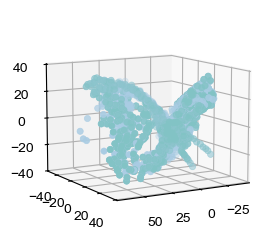

In [42]:
fig = plt.figure(figsize=(6, 3))
ax = Clear_Axes(fig.add_subplot(111, projection='3d'), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
for i in range(len(dlap_R0)-1):
    forward_idx = np.where(is_forward(nodes_traj[np.concatenate((idx_R0, idx_R))][dlap_R0[i]:dlap_R0[i+1]], trace['maze_type']))[0]
    ax.scatter(
        reduced_data[dlap_R0[i]:dlap_R0[i+1], 0][forward_idx], 
        reduced_data[dlap_R0[i]:dlap_R0[i+1], 1][forward_idx],
        reduced_data[dlap_R0[i]:dlap_R0[i+1], 2][forward_idx],
        color=DSPPalette[0],
        linewidth=0.5
    )
dlap_R = np.concatenate(([0], np.where(np.diff(lap_traj[idx_R]) != 0)[0]+1, [len(idx_R)]))
for i in range(len(dlap_R)-1):
    forward_idx = np.where(is_forward(nodes_traj[np.concatenate((idx_R0, idx_R))][dlap_R[i]:dlap_R[i+1]], trace['maze_type']))[0]
    ax.scatter(
        reduced_data[dlap_R[i]:dlap_R[i+1], 0][forward_idx], 
        reduced_data[dlap_R[i]:dlap_R[i+1], 1][forward_idx], 
        reduced_data[dlap_R[i]:dlap_R[i+1], 2][forward_idx],    
        color=DSPPalette[1],
        linewidth=0.5
    )
ax.view_init(elev=10, azim=60)